In [23]:

def get_cluster_by_sdp_NMF(X,K):
    alpha = 1e-6 # Step size
    tol = 1e-6 # Tolerance of stopping criteria
    maxiter = 50000 # Maximum of iterations
 
    # Initialization
    n = X.size(1) # Sample size
    nmX = torch.linalg.norm(X, 'fro') # Norm of matrix X
    r = 2*K # Rank of the matrix in NNMF

    # Implement algorithm
    ## Random intialization
    rand_tensor = torch.randn(n, r)# Generate an n x r tensor with random numbers from a standard normal distribution
    U_p = torch.abs(rand_tensor)# Take the absolute value of each element
    norm_U_p = torch.linalg.norm(U_p, 'fro')
    U = U_p / norm_U_p * nmX

    for iter in range(maxiter):
        G = grad_L(U, X)
        Unew = torch.nn.functional.relu(U - alpha*G)
        rdiff = torch.linalg.norm(Unew - U, 'fro')  / torch.linalg.norm(U, 'fro')# Evaluate iterate
        U = Unew #Update the variable
        if rdiff < tol:  # Stopping criteria
            print("Stopping criteria met. Breaking the loop.")
            break

            
    cluster_est = sdp_sol_to_cluster(U, K)
    return(cluster_est)


In [21]:
def grad_L(U, X):
    """
    Calculates the gradient of a function with respect to U.
  
    Args:
        U (torch.Tensor): A tensor representing the matrix U.
        X (torch.Tensor): A tensor representing the matrix X.

    Returns:
        torch.Tensor: The calculated gradient.
    """
    term1 = -4 * torch.matmul(X.T, torch.matmul(X, U))
    term2 = 4 * torch.matmul(U, torch.matmul(U.T, U))
  
    return term1 + term2

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

def sdp_sol_to_cluster(Z_opt, K):
    """
    Performs a spectral clustering-like operation.
    
    Args:
        Z_opt (np.array): The input matrix (e.g., from an SDP solution).
        K (int): The number of clusters.

    Returns:
        np.array: A row vector of cluster assignments.
    """
    # Use TruncatedSVD to efficiently get the top K singular vectors.
    # U_top_K is n x K, where n is the number of data points.
    svd = TruncatedSVD(n_components=K)
    U_top_K = svd.fit_transform(Z_opt)

    # Perform K-means clustering on the singular vectors.
    # 'n_init' is the equivalent of 'Replicates' in MATLAB's kmeans.
    # 'max_iter' is the equivalent of 'MaxIter'.
    kmeans = KMeans(n_clusters=K, n_init=10, max_iter=500, random_state=0)
    kmeans.fit(U_top_K)
    
    cluster_est  = kmeans.labels_

    # Return cluster assignments as a row vector
     
    return cluster_est
 

In [ ]:
opt_foo1 = torch.compile(get_cluster_by_sdp_NMF)

Running the clustering algorithm...
Stopping criteria met. Breaking the loop.

Visualizing the results...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


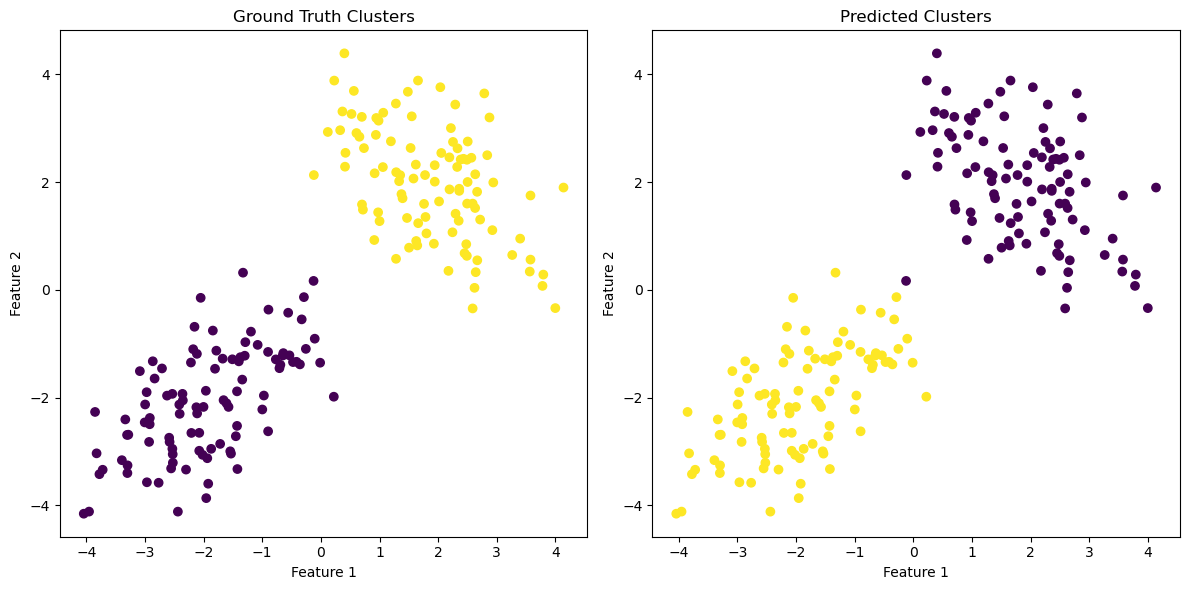

In [ ]:
import matplotlib.pyplot as plt
# --- Test the function with a 2D bicluster Gaussian mixture ---
def create_gaussian_mixture_data(n_samples=200, n_clusters=2):
    """Generates synthetic 2D data for bicluster Gaussian mixture."""
    centers = [(-2, -2), (2, 2)]
    covariances = [[[1, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 1]]]
    
    # Create the first cluster
    cluster1 = torch.tensor(np.random.multivariate_normal(centers[0], covariances[0], n_samples//2), dtype=torch.float32)
    labels1 = torch.zeros(n_samples//2)
    
    # Create the second cluster
    cluster2 = torch.tensor(np.random.multivariate_normal(centers[1], covariances[1], n_samples//2), dtype=torch.float32)
    labels2 = torch.ones(n_samples//2)
    
    data = torch.cat((cluster1, cluster2), dim=0)
    labels = torch.cat((labels1, labels2), dim=0)
    
    # The clustering algorithm expects a p x n matrix, where p is features (2) and n is samples.
    # So we transpose the data.
    return data.T, labels



In [52]:
for i in range(10):
    print(f"--- Running iteration {i+1}/10 ---")
    X_data, ground_truth_labels = create_gaussian_mixture_data(n_samples=200)
    K = 2
    predicted_labels = get_cluster_by_sdp_NMF(X_data, K)
    # You might want to add code here to store or analyze the results of each iteration
    print(f"Iteration {i+1} complete. Predicted labels shape: {predicted_labels.shape}\n")

--- Running iteration 1/10 ---
Stopping criteria met. Breaking the loop.
Iteration 1 complete. Predicted labels shape: (200,)

--- Running iteration 2/10 ---


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 2 complete. Predicted labels shape: (200,)

--- Running iteration 3/10 ---
Stopping criteria met. Breaking the loop.
Iteration 3 complete. Predicted labels shape: (200,)

--- Running iteration 4/10 ---


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 4 complete. Predicted labels shape: (200,)

--- Running iteration 5/10 ---
Stopping criteria met. Breaking the loop.
Iteration 5 complete. Predicted labels shape: (200,)

--- Running iteration 6/10 ---


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 6 complete. Predicted labels shape: (200,)

--- Running iteration 7/10 ---
Stopping criteria met. Breaking the loop.
Iteration 7 complete. Predicted labels shape: (200,)

--- Running iteration 8/10 ---


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 8 complete. Predicted labels shape: (200,)

--- Running iteration 9/10 ---


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 9 complete. Predicted labels shape: (200,)

--- Running iteration 10/10 ---
Iteration 10 complete. Predicted labels shape: (200,)



c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
 

    
    print("Running the clustering algorithm...")
    predicted_labels = get_cluster_by_sdp_NMF(X_data, K)
    
    print("\nVisualizing the results...")
    
    # Plotting the results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Ground Truth plot
    axes[0].scatter(X_data[0].numpy(), X_data[1].numpy(), c=ground_truth_labels.numpy(), cmap='viridis')
    axes[0].set_title('Ground Truth Clusters')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    
    # Predicted Clusters plot
    axes[1].scatter(X_data[0] , X_data[1] , c=predicted_labels , cmap='viridis')
    axes[1].set_title('Predicted Clusters')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

In [53]:
# Function to create high-dimensional data
def create_high_dim_data(n_samples=200, n_features=500):
    """Generates synthetic high-dimensional data."""
    # Create a single cluster from a standard normal distribution
    data = torch.randn(n_samples, n_features)
    
    # The clustering algorithm expects a p x n matrix (features x samples)
    return data.T

if __name__ == '__main__':
    num_runs = 10
    
    for run_idx in range(num_runs):
        print(f"\n--- Starting Run {run_idx + 1}/{num_runs} ---")
        
        X_data = create_high_dim_data(n_samples=200, n_features=500)
        K = 2
        
        print(f"Input data shape: {X_data.shape}")
        print(f"Running the clustering algorithm with K={K} on high-dimensional data...")
        
        predicted_labels = get_cluster_by_sdp_NMF(X_data, K)
        
        print("Run Complete.")
        print(f"Output cluster assignments tensor shape: {predicted_labels.shape}")
  


--- Starting Run 1/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 2/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 3/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 4/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 5/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 6/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 7/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 8/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 9/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Run Complete.
Output cluster assignments tensor shape: (200,)

--- Starting Run 10/10 ---
Input data shape: torch.Size([500, 200])
Running the clustering algorithm with K=2 on high-dimensional data...
Run Complete.
Output cluster assignments tensor shape: (200,)


c:\Users\jongmin\miniconda3\envs\sdpkmeans\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
# Define the device to use
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [51]:
torch.cuda.is_available()

False